In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

%reload_ext autoreload
%autoreload 2

from fastai import *
from fastai.basics import *

['rossmann.tgz']


## Extract the data and preview it

In [2]:
import tarfile
tf = tarfile.open("../input/rossmann.tgz")
tf.extractall("./rossman")

data_path=Path.cwd()/'rossman'
for i in data_path.glob('*.*'):
    print(i.name)

test.csv
store.csv
train.csv
googletrend.csv
state_names.csv
weather.csv
sample_submission.csv
store_states.csv


In [3]:
table_names = ['train', 'store', 'store_states', 'state_names', 'googletrend', 'weather', 'test']
tables = [pd.read_csv(data_path/f'{fname}.csv', low_memory=False) for fname in table_names]
train, store, store_states, state_names, googletrend, weather, test = tables
print (len(train),len(test))
train.head()

1017209 41088


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store_states.head()

,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


In [6]:
state_names.head()

,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


In [7]:
weather.head()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,65,1013,1005,1001,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,78,1028,1022,1014,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,77,1035,1030,1026,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,87,1036,1035,1034,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,87,1035,1034,1033,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


In [8]:
googletrend.head()

,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


## Explore and Visualise

In [9]:
train_df = train.set_index ('Date')
train_df = train_df.sort_values (['Date'])
train_df = train_df.loc ['2013-11-27':'2013-11-30']
print (train_df.shape)
train_df.sample(5)

(4460, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-11-27,284,3,3834,357,1,0,0,0
2013-11-27,117,3,3505,471,1,0,0,0
2013-11-27,17,3,5711,749,1,0,0,0
2013-11-28,553,4,5643,528,1,0,0,0
2013-11-28,436,4,4709,576,1,0,0,0


In [12]:
train_store_df = train [train['Store'] < 4]
train_store_df['Date'] = pd.to_datetime(train_store_df['Date'], infer_datetime_format=True)
train_store_df['Month'] = train_store_df['Date'].dt.month
train_store_df['Year'] = train_store_df['Date'].dt.year
train_store_df['Weekday'] = train_store_df['Date'].dt.weekday_name

train_store_df = train_store_df.set_index ('Date').sort_values (['Date', 'Store'])

train_store_df ['StateHoliday'] = train_store_df['StateHoliday'].apply(lambda x: 3 if x == '0' else 4)

train_store_df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Weekday
Date,,,,,,,,,,,
2013-01-01,1,2,0,0,0,0,4,1,1,2013,Tuesday
2013-01-01,2,2,0,0,0,0,4,1,1,2013,Tuesday
2013-01-01,3,2,0,0,0,0,4,1,1,2013,Tuesday
2013-01-02,1,3,5530,668,1,0,3,1,1,2013,Wednesday
2013-01-02,2,3,4422,650,1,0,3,1,1,2013,Wednesday


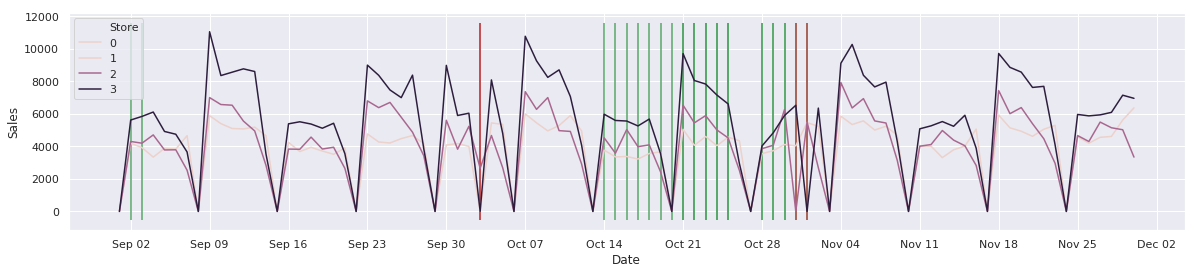

In [13]:
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})

def plot_ts (plot_df, weekly=False):
    state_holidays = plot_df [plot_df ['StateHoliday'] == 4].index
    school_holidays = plot_df [plot_df ['SchoolHoliday'] == 1].index

    ax = sns.lineplot (data = plot_df, x = plot_df.index, y = "Sales", hue = "Store")

    # See weekly seasonality with vertical white gridlines on the first 
    # Monday of each week (instead of on the first day of each month)
    if (weekly):
        # Set x-axis major ticks to weekly interval, on Mondays
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
        # Format x-tick labels as 3-letter month name and day number
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
    
    ymin, ymax = ax.get_ylim()
    ax.vlines(x=school_holidays , ymin=ymin, ymax=ymax, color='g')
    ax.vlines(x=state_holidays , ymin=ymin, ymax=ymax, color='r')


df = train_store_df.loc['2013-09': '2013-11']
plot_ts (df, True)

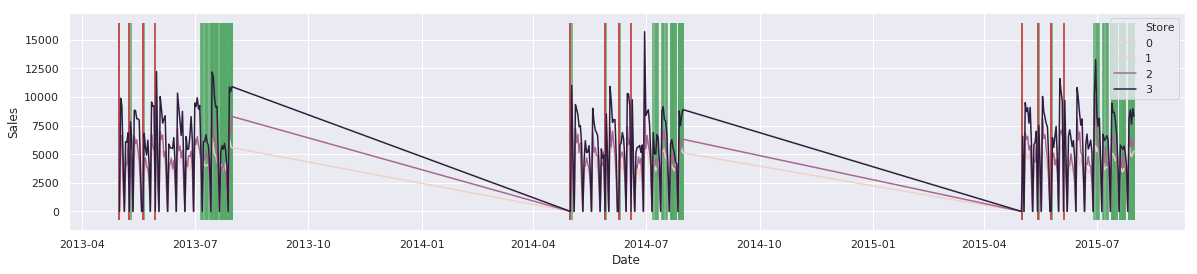

In [14]:
df = train_store_df [(train_store_df ['Month'] > 4) & (train_store_df ['Month'] < 8)]
plot_ts (df)

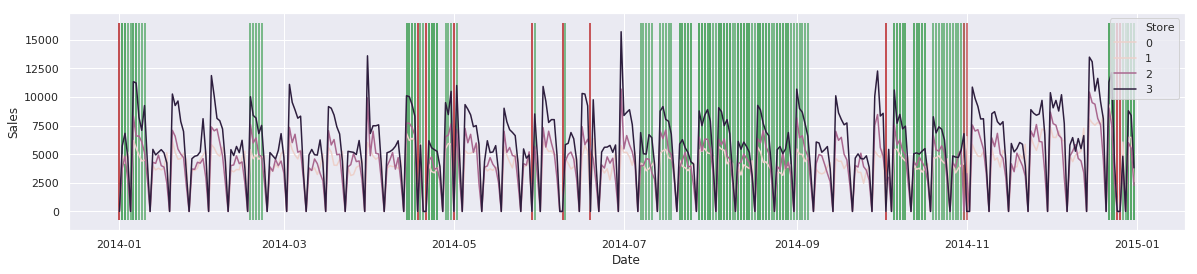

In [15]:
df = train_store_df ['2014']
plot_ts (df)

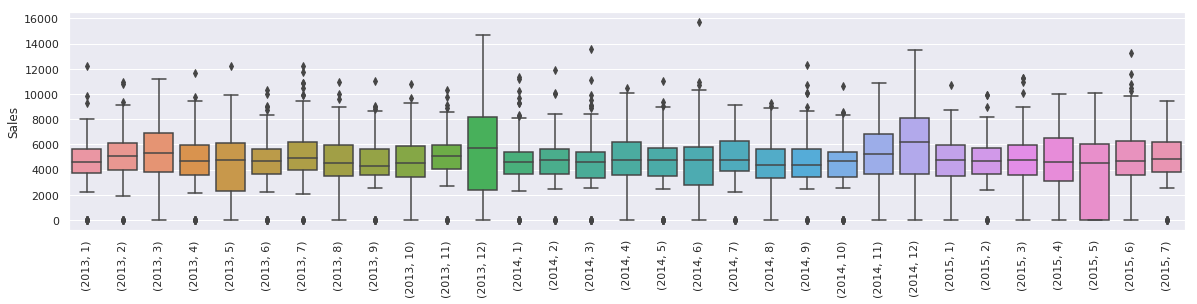

In [16]:
df = train_store_df.set_index (['Year','Month'])
df.head()
ax = sns.boxplot(data=df, x=df.index, y='Sales')
ax.tick_params(axis='x', labelrotation=90)

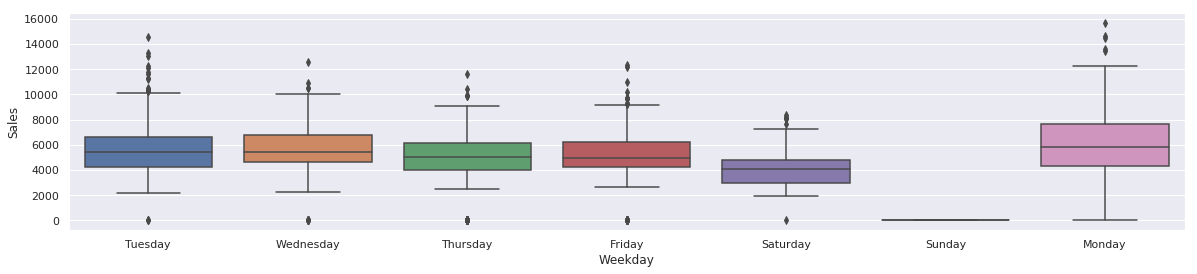

In [17]:
sns.boxplot(data=train_store_df, x='Weekday', y='Sales');

In [18]:
multi_df = train [train['Store'] < 4]
multi_df['Date'] = pd.to_datetime(multi_df['Date'], infer_datetime_format=True)
multi_df = multi_df.set_index (['Date', 'Store']).sort_values (['Date', 'Store'])
idx = pd.IndexSlice
multi_df = multi_df.loc[idx['2013-09': '2013-11', :], :]
level_values = multi_df.index.get_level_values
date_values, store_values = level_values(0), level_values(1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


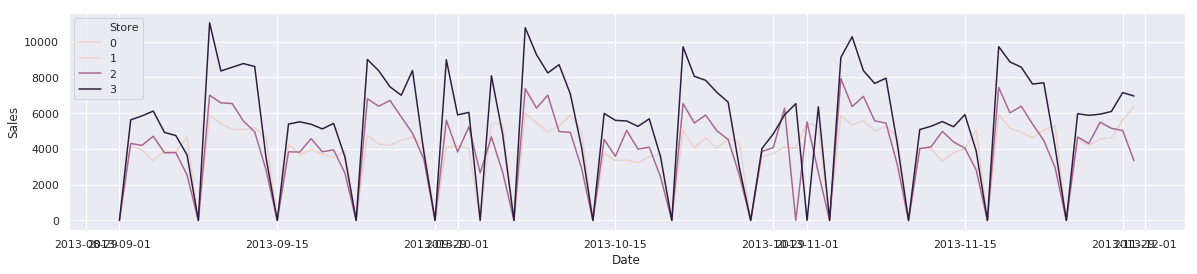

In [19]:
sns.lineplot (data = multi_df, x = date_values, y = "Sales", hue = store_values)

In [20]:
# See the solution - https://stackoverflow.com/questions/15799162/resampling-within-a-pandas-multiindex
myl = [level_values(i) for i in [1]]
mym = [pd.Grouper(freq='M', level=0)]
result = multi_df[['Sales', 'Customers']].groupby (mym + myl).sum()
#result = (df.groupby([level_values(i) for i in [0,1]] +[pd.Grouper(freq='2D', level=-1)]).sum())
result

Sales  Customers
Date       Store                   
2013-09-30 1      108867      13212
           2      119081      14278
           3      163290      18139
2013-10-31 1      114641      13960
           2      120362      14724
           3      168277      18863
2013-11-30 1      127596      15270
           2      128628      14833
           3      169580      18656

2013-10-31 00:00:00


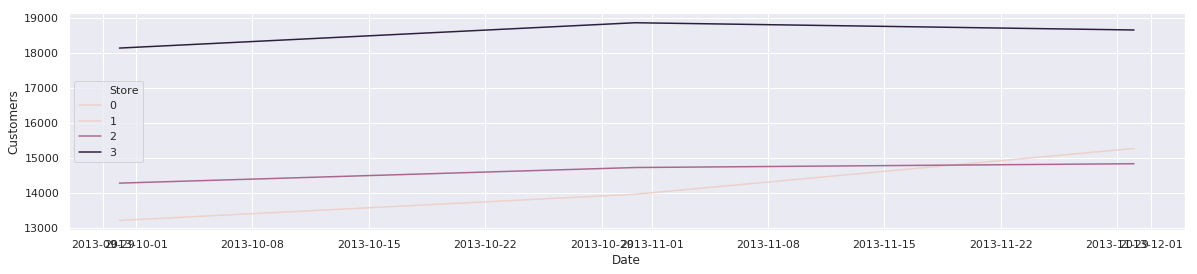

In [22]:
result_level_values = result.index.get_level_values
result_date_values, result_store_values = result_level_values(0), result_level_values(1)
print (result_date_values[4])
result_date_values, result_store_values
#sns.lineplot (data = result, x = ['a', 'a','a', 'b', 'b','b','c', 'c', 'c'], y = "Customers", hue = result_store_values)
sns.lineplot (data = result, x = result_date_values, y = "Customers", hue = result_store_values)

## Convert Dates and Extract Date Features

In [23]:
# Convert State Holidays to booleans
train.StateHoliday = train.StateHoliday!='0'
test.StateHoliday = test.StateHoliday!='0'
train.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
517094,520,2,2014-03-25,2849,334,1,0,False,0


In [24]:
# Do a Left Outer Join on the given 'left_on' and 'right_on' fields
# 'suffixes' describes the naming convention for duplicate fields. 
# We leave the duplicate field names on the left untouched, and append a "_y" to those on the right
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [25]:
weather = join_df(weather, state_names, "file", "StateName")
weather.sample()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,State
7206,Hessen,2013-10-04,14,11,8,9,6,1,88,71,36,1022,1020,1018,26.0,14.0,10.0,16,11,NaN,0.25,6.0,Rain,63,Hessen,HE


In [26]:
# Split the 'week' and 'file' columns into separate parts.
# Note that 'expand = True' creates separate columns for each part
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'
googletrend.sample()

,file,week,trend,Date,State
1179,Rossmann_DE_BW,2015-08-30 - 2015-09-05,83,2015-08-30,BW


In [27]:
# Extract separate feature columns for all relevant attributes of DateTime fields
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    
    # If it is a custom datatime datatype, change the type to the standard datetime
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        print ('Found DatetimeTZDtype ', fldname)
        fld_dtype = np.datetime64

    # If it is not already a datetime datatype, convert it to datetime
    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    
    # Get any prefix in the field name before the word 'Date'
    # We will pre-pend this prefix to any new column names that we extract below
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
    # List of attributes for which we want to extract separate columns
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    # Include attributes for time in the list
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    
    # Create a separate column for each attribute.
    # Column name is created by concatentating the 'prefix' and the 'attribute'
    # All datetime columns have ".dt" from which we extract all the required attributes
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    
    # Create an Elapsed column
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    
    # Drop the original date column if needed
    if drop: df.drop(fldname, axis=1, inplace=True)

In [28]:
add_datepart(weather, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
add_datepart(googletrend, "Date", drop=False)
googletrend.sample()

,file,week,trend,Date,State,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
1335,Rossmann_DE_SH,2012-12-23 - 2012-12-29,53,2012-12-23,SH,2012,12,51,23,6,358,False,False,False,False,False,False,1356220800


**Now outer join all of our data into a single dataframe.**

Check that there are no NULL values after the outer join (which means that there was no matching right-side value)

In [29]:
store = join_df(store, store_states, "Store")
len(store[store.State.isnull()])

0

In [30]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]),len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [31]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [32]:
# The Google trends data has a special category for the whole of the Germany - we'll pull that out so we can use it explicitly
trend_de = googletrend[googletrend.file == 'Rossmann_DE']
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]),len(joined_test[joined_test.trend_DE.isnull()])

(0, 0)

In [33]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [34]:
joined.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,file,week,trend,Date_y,Month_y,Day_y,Dayofweek_y,Dayofyear_y,...,Is_year_end_DE,Is_year_start_DE,Elapsed_DE,file_y,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,Year_y,Month_y,Week_y,Day_y,Dayofweek_y,Dayofyear_y,Is_month_end_y,Is_month_start_y,Is_quarter_end_y,Is_quarter_start_y,Is_year_end_y,Is_year_start_y,Elapsed_y
31044,940,6,2015-07-04,5291,534,1,0,False,0,2015,7,27,4,5,185,False,False,False,False,False,False,1435968000,d,c,6470.0,9.0,2012.0,0,NaN,NaN,NaN,SN,Rossmann_DE_SN,2015-07-05 - 2015-07-11,60,2015-07-05,7,5,6,186,...,False,False,1436054400,Sachsen,36,28,21,17,14,12,64,40,18,1024,1021,1018,31.0,29.0,26.0,19,13,NaN,0.0,NaN,NaN,153,Sachsen,2015,7,27,4,5,185,False,False,False,False,False,False,1435968000


In [35]:
# Drop all the duplicate "_y" columns
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

In [36]:
# Replace missing values with an arbitrary constant value that doesn't appear in the actual data
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [37]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

# Replace erroneous values
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

# Add "CompetitionMonthsOpen" field, limiting the maximum to 2 years to limit number of unique categories
for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24

In [38]:
# Same process for Promo dates
from isoweek import Week

for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

In [39]:
joined.to_pickle(data_path/'joined')
joined_test.to_pickle(data_path/'joined_test')

### Durations
It is common when working with time series data to extract data that explains relationships across rows as opposed to columns, e.g.:
* Running averages
* Time until next event
* Time since last event

This is often difficult to do with most table manipulation frameworks, since they are designed to work with relationships across columns. So create a class to handle this type of data.

In [40]:
# for cumulative counting across a sorted dataframe. Given a particular field fld to monitor, 
# start tracking time since the last occurrence of that field. When the field is seen 
# again, the counter is set to zero.
# Upon initialization, this will result in datetime na's until the field is encountered. 
# This is reset every time a new store is seen
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]
df = train[columns].append(test[columns])

In [41]:
# First sort by Store, then Date
# Then call add_elapsed('SchoolHoliday', 'After'). This will apply to each row with School Holiday:
#     1. Applied to every row of the dataframe in order of Store and Date
#     2. Will add to the dataframe the days since seeing a School Holiday
#     3. If we sort in the other direction, this will count the days until another holiday.

fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

# Do the same for StateHoliday and Promo
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [42]:
# set the active index to Date
df = df.set_index("Date")

# set null values from elapsed field calculations to 0
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

In [43]:
# sort by date (sort_index()) and count the number of events of interest (sum()) defined in
# columns in the following week (rolling()), grouped by Store (groupby()). We do the same in the opposite direction
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()
fwd = df[['Store']+columns].sort_index(ascending=False).groupby("Store").rolling(7, min_periods=1).sum()

# drop the Store indices grouped together in the window function. Doing it "in place" is time and memory efficient
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

df.reset_index(inplace=True)

# merge these values onto the df
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])
df.drop(columns,1,inplace=True)

df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,104,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,103,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,102,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,101,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


In [44]:
df["Date"] = pd.to_datetime(df.Date)
joined = join_df(joined, df, ['Store', 'Date'])
joined_test = join_df(joined_test, df, ['Store', 'Date'])

joined = joined[joined.Sales!=0]

joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

joined.to_pickle(data_path/'train_clean')
joined_test.to_pickle(data_path/'test_clean')